<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Data Analysis with Python: "House Sales in King County, USA" </font></h1>




### Stephane DEDIEU 

<div class="alert alert-block alert-info">
<b>Final Assignment for "IBM Course - Data Analysis with Python", May 2nd, 2022. <br>
This project is part of IBM Data Science certificate. We reviewed it and improved it in August 2022. </b>
</div>

Link of interest: <br>
https://www.opendoor.com/w/blog/factors-that-influence-home-value


# Introduction 

## Business Case 

<span style="color: #2e86c1"> The project consists of finding the best model for predicting home prices in a county: King County, USA in Washington state, based on a dataset of homes sold between May 2014 and May 2015, including prices and a set of factors. <br> 
Based on the literature*, eight critical factors influence a home's value. 

1. Neighborhood comps: Recency, Feature Similarity, Distance, 
2. Location: quality of local schools, employment opportunities, proximity to shopping, entertainment, and recreational centers
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. The local market
7. Economic indicators
8. Interest rates

<span style="color: #2e86c1"> The dataset available, covers most critical factors except "economic ones" 7 and 8. The local market can somewhat be deduced from an early analysis.  <br>
First we analyse and visuzalize the data.   <br>
Second we develop a model with several ML predictive methods.  <br>




*Reference: 
https://www.opendoor.com/w/blog/factors-that-influence-home-value

Business understanding  <br>
Analytic Approach   <br>
Data Requirements   <br>
Data Collection     <br>
Data Understanding and Preparation  <br>
Modeling and Evaluation  <br>

1. Data collection from open Data base.
2. Data wrangling.
3. Exploratory data analysis.
4. Visual analytics with Folium.
5. Regression Models development and validations. Selection of best predictive model.

## Dataset:  House Sales in King County, USA


<span style="color: #2e86c1"> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

##  King County, USA

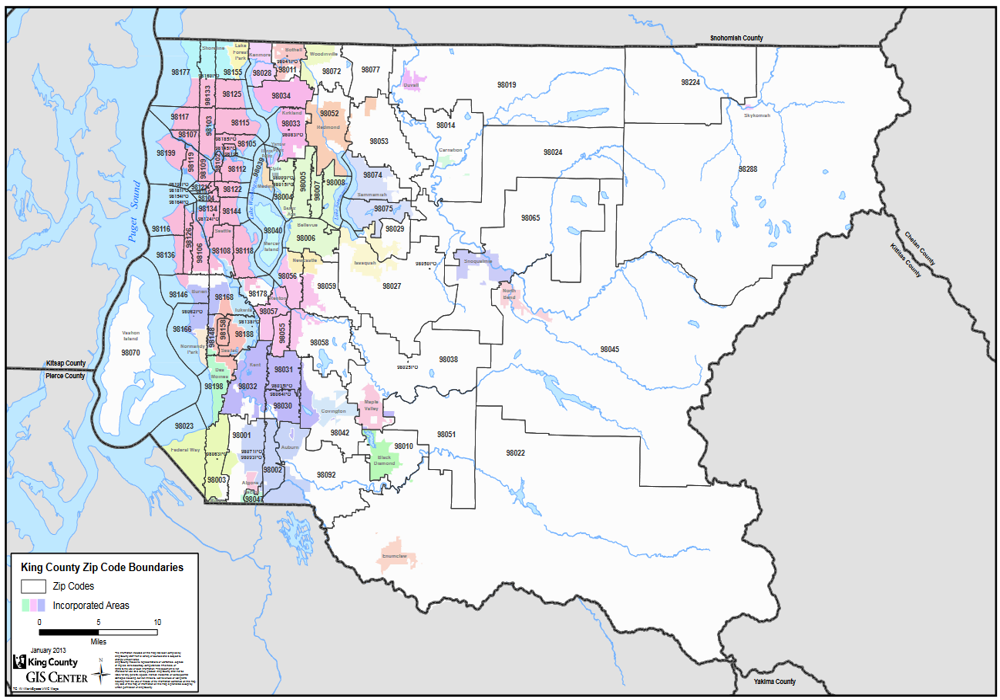

In [239]:
from IPython import display
from PIL import Image

#image = Image.open("#######/Project_KingCounty_HouseSales/Zip_codes_KingCounty.png")
#print(f"Original size : {image.size}") # 5464x3640
#img_resized = image.resize((1000, 700))
#img_resized.save('Zip_codes_KingCounty_64.png')
display.Image('Zip_codes_KingCounty_64.png')

<span style="color: #2e86c1"> King county is made up of Seattle and its suburbs to the west and rural areas to the east, borded by the Columbia river. The Zip code is expected to have an influence on house prices. Since latitude and longitude are part of the data, and may bring additional information about home's prices v. location, we will implement interactive maps with Folium.

## Required libraries


In [191]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [192]:
#!pip install webdriver-manager

In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [194]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [195]:
import io
from PIL import Image
#!pip install selenium

In [196]:
#from selenium import webdriver
#import os
#import time

from webdriver_manager.firefox import GeckoDriverManager # Code 2
driver = webdriver.Firefox(executable_path=GeckoDriverManager().install()) # Code 3

from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager

driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())

driver.get("http://www.python.org")

driver.close()

# Importing Data Sets

Load the csv file:


In [197]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [198]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data types

<span style="color: #2e86c1"> Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [199]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<span style="color: #2e86c1"> We use the method "describe" to obtain a statistical summary of the dataframe.


In [200]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#  Data Wrangling


### Cleaning the dataframe

<span style="color: #2e86c1"> Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>


In [201]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.head()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<span style="color: #2e86c1"> Based on "count", the maximum number of houses and records is 21613.  If information is available for most features, there are missing values in "bedroom" and "bathrooms". Respectiviely, only 21600 and 21603 values. Instead of 21613. <br>
We replace missing values and replace them with the mean value in each column. 

### Detect and replace missing values 

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [202]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


<span style="color: #2e86c1"> We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [203]:
meanBed=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, meanBed, inplace=True)

<span style="color: #2e86c1"> We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [204]:
meanBath=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, meanBath, inplace=True)

In [205]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis (EDA)


## Number of houses with unique floor values

In [206]:
dfloor=df['floors'].value_counts()
df_floors_counts = dfloor.to_frame()
df_floors_counts = df_floors_counts.reset_index()
df_floors_counts.columns = ['Number of floors', 'Counts of houses'] # change column names
df_floors_counts

,Number of floors,Counts of houses
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


## Home price outliers

<span style="color: #2e86c1"> Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


Text(0, 0.5, 'price US$')

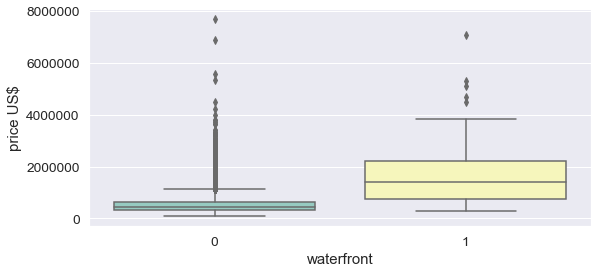

In [207]:
sns.set_style("ticks",{'axes.grid' : True})
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,4))
plt.ticklabel_format(style='plain', axis='y')
p=sns.boxplot(x="waterfront", y="price", data=df, palette="Set3")
p.set_ylabel("price US$")

In [208]:
d_wf=df['waterfront'].value_counts()
d_wf_counts = d_wf.to_frame()
d_wf_counts = d_wf_counts.reset_index()
d_wf_counts.columns = ['Waterfront', 'Counts of houses'] # change column names
d_wf_counts

,Waterfront,Counts of houses
0,0,21450
1,1,163


<span style="color: #2e86c1"> Houses without a waterfront view have more price outliers. <br>  But the number of waterfront houses is low, and this criteria may not be significant. </span> 



## Correlation <code>sqft_above</code> with price.

R²= 0.3667117528382794


Text(0, 0.5, 'price US$')

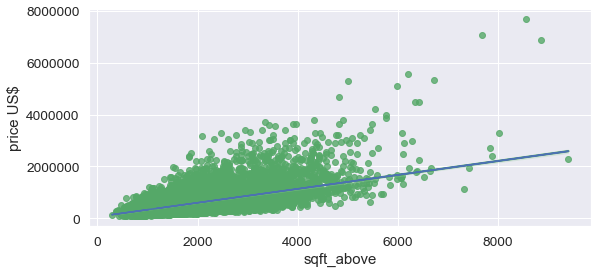

In [209]:
# we compute LinearRegression separately and will plot the regression line. 
X=df["sqft_above"].to_numpy()
X=X.reshape(-1, 1)
Y=df["price"].to_numpy()
reg = LinearRegression().fit(X, Y)
#print(reg.coef_, reg.intercept_)
print("R\N{SUPERSCRIPT TWO}=", reg.score(X, Y))
#import matplotlib.pyplot as plt
sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(color_codes=True)
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,4))
plt.ticklabel_format(style='plain', axis='y')


#p=sns.regplot(x="sqft_above", y="price", data=df, order=1, marker="+", color="g")
p=sns.regplot(x="sqft_above", y="price", data=df, order=1, color="g")
plt.plot(X, reg.coef_*X + reg.intercept_,  color="b"    )                                                                          
p.set_xlabel("sqft_above")
p.set_ylabel("price US$")


<span style="color: #2e86c1">  Based on the positive slope of the linear regression line, feature 'sqft_above' is positively correlated with price. Meaning home value increases with sqft, which is pretty "intuitive", but not the single factor.  </span>  

## Price v. features. Correlation table. 

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [210]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<span style="color: #2e86c1">  Most features are positively correlated with price, including sqft_above, which confirms the previous results. <br>
<span style="color: #2e86c1">  Nevertheless, correlation is weak for many features: after "floors", correlation drops significantly. <br> 
Particularly longitude and ZipCode don't seem to have an impact on prices, when we would expect to find inexpensive homes in rural areas. <br>    
We investigate homes prices v. location with interactive maps.  


# Visual analytics with Folium

In [211]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
#import folium
import webbrowser

<span style="color: #2e86c1"> Interactive maps will show homes location the dataset. By clicking on markers whose colors depends on prices from yellow(low) to red (high), price and sqft will be displayed.  <br>
Zoom can be used for more accurate price v. location analysis. 

<span style="color: #2e86c1"> Most houses in the dataset are located west of King County, in a vertical corridor along the coast: Seattle and suburbs (greater Seattle area, GSA?). Therefore longitude does not have a strong impact on prices.  Latitude is a more important features. Let's examine if most expensive houses and least expensive houses prices, resp. with prices above the 95% and below the 5% quantiles, defines specific areas of the GSA. 

In [212]:
price95= df['price'].quantile(0.95)
price5= df['price'].quantile(0.05)

np.floor(price5), np.floor(price95)

(210000.0, 1156479.0)

## Most expensive houses

In [213]:
# Seattle location = [47.65, -122.0]

# top home prices  > 95%
# make a dataframe with the quantile
expensive_homes = df[(df['price'] >= price95)]
##print(expensive_homes.head())
#---
f = folium.Figure(width=1000, height=500)
#---
expensive_homes_map = folium.Map(location=[47.65, -122.0], zoom_start=10, tiles='openstreetmap').add_to(f)

#-- for proper indexing... 
df1 = pd.DataFrame(columns=["marker_color"])
expensive_homes = expensive_homes.join(df1, how="outer")
####print(expensive_homes.head())
#expensive_homes["marker_color"]= pd.cut(x= expensive_homes["price"], bins=4, labels=['yellow', 'green', 'blue', 'red'])
expensive_homes["marker_color"]= pd.cut(x= expensive_homes["price"], bins=4, labels=['magenta', 'red', 'brown','purple'])


for i in expensive_homes.index:
    lat = expensive_homes.lat[i]
    long = expensive_homes.long[i]
    price = expensive_homes.price[i]
    sqft_living = expensive_homes.sqft_living[i]
    color_mark=expensive_homes.marker_color[i]
    #marker = folium.Marker([lat, long]).add_to(expensive_homes_map)
    popup_text = "Price $: {} , Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
   # marker = folium.Marker([lat, long], radius=15, color=color_exp , popup=popup).add_to(expensive_homes_map)
    folium.CircleMarker([lat,long],  radius=3, color= color_mark, popup=popup).add_to(expensive_homes_map)
             #       radius=15, color=expensive_homes['marker_color']).add_to(expensive_homes_map)

        

#----------------------------------------------------------------------------------------------------------------------
# THE FOLLOWING INSTRUCTION DISPLAYS THE INTERACTIVE MAP... that will not show up when exporting the notebook to LateX ! 
#-----------------------------------------------------------------------------------------------------------------------
expensive_homes_map


<span style="color: #2e86c1"> Location is an important feature, most expensive homes are located on a waterfront either the ocean or a lake.   

## Least expensive houses

In [214]:
# lower prices < 5%
# make a dataframe with the quantile
inexpensive_homes = df[(df['price'] <= price5)]
inexpensive_homes.head()

# make a dataframe with the quantile
inexpensive_homes = df[(df['price'] <= price5)]
#inexpensive_homes.head()

f = folium.Figure(width=1000, height=500)
#---
inexpensive_homes_map = folium.Map(location=[47.65, -122.0], zoom_start=10, tiles='openstreetmap').add_to(f)

#-- for proper indexing... 
df1 = pd.DataFrame(columns=["marker_color"])
inexpensive_homes = inexpensive_homes.join(df1, how="outer")
####print(expensive_homes.head())
#inexpensive_homes["marker_color"]= pd.cut(x= inexpensive_homes["price"], bins=4, labels=['yellow', 'green', 'blue', 'red'])
inexpensive_homes["marker_color"]= pd.cut(x= inexpensive_homes["price"], bins=3, labels=['yellow', 'green', 'cyan'])



for i in inexpensive_homes.index:
    lat = inexpensive_homes.lat[i]
    long = inexpensive_homes.long[i]
    price = inexpensive_homes.price[i]
    sqft_living = inexpensive_homes.sqft_living[i]
    color_exp=inexpensive_homes.marker_color[i]
    #marker = folium.Marker([lat, long]).add_to(expensive_map)
    popup_text = "Price $: {} , Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
   # marker = folium.Marker([lat, long], radius=15, color=color_exp , popup=popup).add_to(expensive_map)
    folium.CircleMarker([lat,long],  radius=3, color= color_exp, popup=popup).add_to(inexpensive_homes_map)
             #       radius=15, color=expensive['marker_color']).add_to(expensive_map)
        
#----------------------------------------------------------------------------------------------------------------------
# THE FOLLOWING INSTRUCTION DISPLAYS THE INTERACTIVE MAP... that will not show up when exporting the notebook to LateX ! 
#-----------------------------------------------------------------------------------------------------------------------
inexpensive_homes_map

<span style="color: #2e86c1"> Least expensive houses are located in southern suburbs close to Tacoma. There are probably other details such as: schools, .... that are not avaiable in the dataset, that could explain the concentration south of Seattle.   <br> 
We will retain latitude as a feature when we develop our model. And discard longitude.  

# Model Development

## Preliminary stage. 

#### Longitude
<span style="color: #2e86c1"> We look at single feature at the moment. First a feature weakly correlated with prices: longitude,  <br>
We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [215]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
y_pred= lm.predict(X)
print("R\N{SUPERSCRIPT TWO}=", lm.score(X, Y))

R²= 0.00046769430149007363


<span style="color: #2e86c1"> R² is close to 0 and confirms previous results (correlation) and obvservations with the interactive map. We can visualize the lack of correlation price v. longitude. 

Text(0, 0.5, 'price US$')

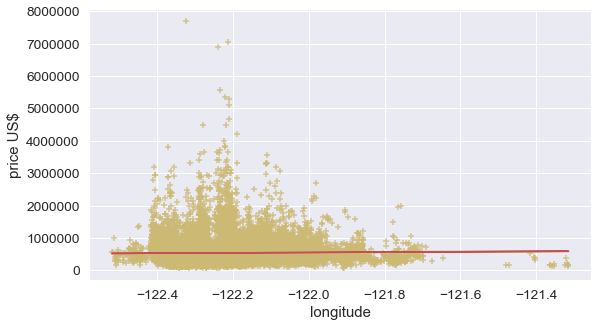

In [216]:
#import matplotlib.pyplot as plt
sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(color_codes=True)
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,5))
plt.ticklabel_format(style='plain', axis='y')

p=sns.regplot(x="long", y="price", data=df, order=1, marker="+", color="y")
plt.plot(X, y_pred,  color="r")

p.set_xlabel("longitude")
p.set_ylabel("price US$")

<span style="color: #2e86c1"> Longitude refers to various areas of the city of Seattle. But this feature is poorly correlated with house prices. <br> A classification of houses per neighborhoods in the county, would be more useful. Although zipcode does not seem to help much, correlation is even weaker and negative. Further analysis is required in terms of houses price per neighborhood. 
<span style="color: #2e86c1"> Longitude has little effect, probably because most houses are in the Seattle area. Latitude has a stronger inluence. Based on localized areas with high prices on the heatmap, we should create a (long, lat) feature.      </span>

#### Square ft  living
<span style="color: #2e86c1"> Based on the correlation Table, price should be significantly correlated with <code>'sqft_living'</code>. 
Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.


R²= 0.4928532179037931


Text(0, 0.5, 'price US$')

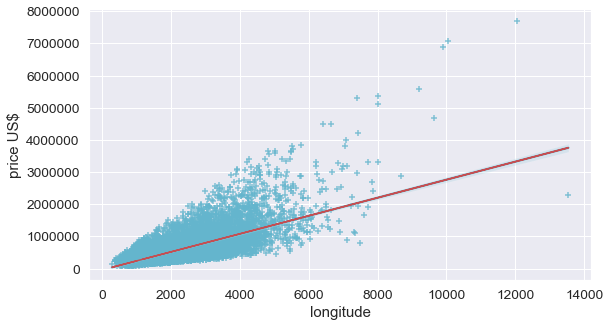

In [217]:
X2 = df[['sqft_living']]
#Y = df['price']
lm2 = LinearRegression()
lm2.fit(X2,Y)
y_pred= lm2.predict(X2)
print("R\N{SUPERSCRIPT TWO}=", lm2.score(X2, Y))

#import matplotlib.pyplot as plt
sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(color_codes=True)
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,5))
plt.ticklabel_format(style='plain', axis='y')

p=sns.regplot(x="sqft_living", y="price", data=df, order=1, marker="+", color="c")
plt.plot(X2, y_pred,  color="r")

p.set_xlabel("longitude")
p.set_ylabel("price US$")


R²= 0.5327430940591443


Text(0, 0.5, 'price US$')

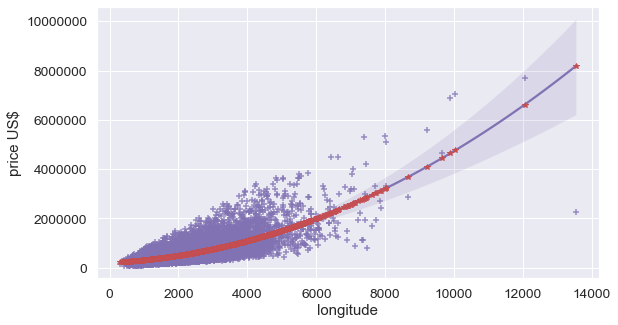

In [218]:
X2 = df[['sqft_living']]
#Y = df['price']

poly = PolynomialFeatures(degree = 2) 
Xpf2 = poly.fit_transform(X2)
lm2 = LinearRegression()
lm2.fit(Xpf2,Y)
y_pred= lm2.predict(Xpf2)

print("R\N{SUPERSCRIPT TWO}=", lm2.score(Xpf2, Y))
sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(color_codes=True)
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,5))
plt.ticklabel_format(style='plain', axis='y')
#------------
p=sns.regplot(x="sqft_living", y="price", data=df, order=2, marker="+", color="m")
plt.plot(X2, y_pred,'r*')
#------------
p.set_xlabel("longitude")
p.set_ylabel("price US$")

R²= 0.5390045510503199


Text(0, 0.5, 'price US$')

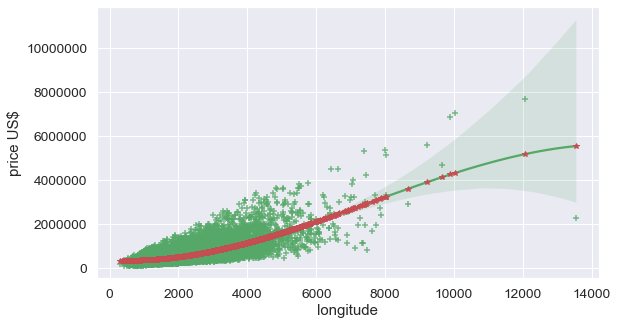

In [219]:
X2 = df[['sqft_living']]
#Y = df['price']

poly = PolynomialFeatures(degree = 3) 
Xpf2 = poly.fit_transform(X2)
lm2 = LinearRegression()
lm2.fit(Xpf2,Y)
y_pred= lm2.predict(Xpf2)

print("R\N{SUPERSCRIPT TWO}=", lm2.score(Xpf2, Y))
sns.set_style("ticks",{'axes.grid' : True})
sns.set_theme(color_codes=True)
sns.set(font_scale = 1.25)
plt.figure(figsize=(9,5))
plt.ticklabel_format(style='plain', axis='y')
#------------
p=sns.regplot(x="sqft_living", y="price", data=df, order=3, marker="+", color="g")
plt.plot(X2, y_pred,'r*')
#------------
p.set_xlabel("longitude")
p.set_ylabel("price US$")

<span style="color: #2e86c1"> "sqft_living" and related surface areas features are strongly correlated with house prices. <br>
Polynomial interpolation of order 2 is a better fit on this feature. <br>
Order 3 does not improve the score. And may lead to overfitting. <br>
---- <br>
Given the importance of "sqft_living" and other dependant "sqft" features on home price, in fitting a regression with multiple features, we expect polynomial interpolation of order 2 to be more efficient than pure linear regression.  

## Fitting linear model regression with multiple features

<span style="color: #2e86c1">Fit a linear regression model to predict the <code>'price'</code> using the list of features with most correlated with prices in correlation Table :

In [220]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

### Polynomial regression 

<span style="color: #2e86c1"><b>Linear regression model with Polynomial interpolation </b> <b> We test: Order 1 (linear), 2, 3, 4 </b>.  <br> We define PipeLines, including "features scaling", polynomial interpolation order from 1 to 4, and a Linear regression model.  

In [221]:
Input= np.empty([5]).astype(list)

for j in range(1,5) :
     Input[j]=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(j,include_bias=False)),('model',LinearRegression())]

<span style="color: #2e86c1"> Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.
As we increase the order of the polynomial, computation time becomes prohibtive.



In [222]:
X_feat = df[features]

for j in range(1,5):
    pipe_line=Pipeline(Input[j])
    #print(pipe_line)
    pipe_line.fit(X_feat,Y)
    print("Regresion Order:",j , " R\N{SUPERSCRIPT TWO}=", pipe_line.score(X_feat,Y))


Regresion Order: 1  R²= 0.657626396659731
Regresion Order: 2  R²= 0.7513404101380663
Regresion Order: 3  R²= 0.8141672842838007
Regresion Order: 4  R²= 0.8562565267209652


<span style="color: #2e86c1"> After scaling, increasing the order of the polynomial,  significantly improves the fit. <br>
This does not guarantee that the model will properly fit new data.  As we see in the next section.    

## Polynomial Regression - Model Evaluation and Refinement


<span style="color: #2e86c1"> In this section we split the dataset in Training and Testing sets for validating the accuracy of the best model. 

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [224]:
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


### Polynomial regression order 2 and 3 

In [225]:
from sklearn import preprocessing
#transform = preprocessing.StandardScaler()
X = df[features]
Y = df['price']
#Xt = transform.fit_transform(X)
#x_train, x_test, y_train, y_test = train_test_split(Xt, Y, test_size=0.2, random_state=13)


poly2 = PolynomialFeatures(degree = 2) 
Xpf2 = poly2.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(Xpf2, Y, test_size=0.2, random_state=13)

In [226]:
model = LinearRegression() 

In [227]:
model.fit(x_train, y_train)
expected_y  = y_test
predicted_y = model.predict(x_test)

In [228]:
print(model.score(x_test,y_test))

0.7492502664714935


In [229]:
poly3 = PolynomialFeatures(degree = 3) 
Xpf3 = poly3.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xpf3, Y, test_size=0.2, random_state=13)

In [230]:
model.fit(x_train, y_train)
expected_y  = y_test
predicted_y = model.predict(x_test)

In [231]:
print(model.score(x_test,y_test))

0.655739446361362


<span style="color: #2e86c1"> order= 3: degrades the performance of the regression model.  <br>
From order=4 the polynomial transform does not allow a proper fit on the test set. <b> Which means that we overfitted the training set.</b> 

### Ridge regression order 2, 3.

<span style="color: #2e86c1"> Will adding regularization to higher order transform improve accuracy ?  

<span style="color: #2e86c1"> Initial method in IBM project was a Ridge regression for improving previous results with porder=2. <br>
<span style="color: #2e86c1"> Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
Linear least squares with l2 regularization.
Minimizes the objective function:    ||y - Xw||^2_2 + alpha * ||w||^2_2   
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [232]:
from sklearn.linear_model import Ridge

In [233]:
X = df[features]
Y = df['price']

poly = PolynomialFeatures(degree = 2) 
X = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)


In [234]:
ridge_model = Ridge(alpha=0.25) 
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

print("R\N{SUPERSCRIPT TWO}=", ridge_model.score(x_test, y_test))

R²= 0.7340742546019136


<span style="color: #2e86c1"> Regularization does not help with order 2 polynomial interpolation and order 3 overfitting. 

### Spline Regression Model


<span style="color: #2e86c1"> <b> Spline interpolation </b>: This is the simple approach to model non-linear relationships. It add polynomial terms or quadratic terms (square, cubes, etc) to a regression.
Spline regression. Fits a smooth curve with a series of polynomial segments. The values delimiting the spline segments are called Knots.
Several paramters "n_knots", "alpha" can improve previous polynomial regression.  We present the best result.  

In [235]:
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

model_spline = make_pipeline(SplineTransformer(n_knots=6, degree=3), Ridge(alpha=1e-3))
model_spline.fit(x_train, y_train)

Pipeline(steps=[('splinetransformer', SplineTransformer(n_knots=6)),
                ('ridge', Ridge(alpha=0.001))])

In [236]:
print("R\N{SUPERSCRIPT TWO}=", model_spline.score(x_test, y_test))

R²= 0.7908562522533551


<span style="color: #2e86c1"> Spline interpolation has improved the accuracy of the model.  From R<sup>2</sup>   = 0.75 to R<sup>2</sup>= 0.79  

# CONCLUSIONS
 
<span style="color: #2e86c1">

<span style="color: #2e86c1"> A regression model with proper interpolation is capable of predicting the price of homes based after multiple features (11) selected among the most relevant ones in the "Price v. Features" correlation table. The feature set covers six out of eight critical factors influencing a home's value described in the introduction. <br>
We tested several methods, with polynomial interpolation having increasing order.  <br>
Regression with polynomial interpolation of order 2 proved to be the best compromise. <br>
We were able to improve the model further by using a spline interpolation with order =3.   <br>
<br>
Regarding the two missing critical factors: interest rates, global economic environment. 
Overall, the dataset includes home sold between May 2014 and May 2015, these factors did not change much during that time frame, home prices had a linear evolution until 2019. <br> Nevertheless, home prices eveolutioon was exponential after 2019 due to low interest rates and monetary creation. These features are not reflected in the dataset. Which would force a regular update of the model. Or an inclusion of features "Interest rates", "Money creation".    

<span style="color: #2e86c1"> In general, Linear regression with polynomial interpolation or polynomial regression, is sensitive to outliers. <br>
We tried to remove some of them, without targetting a particular feature. The method did not improve accuracy, even with a spline interpolation. 
The "outlier method" could be refined by targeting specific features, like "waterfront" for example.
This could be investigated in future developement.   

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
